# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [661]:
import imageio
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt
from collections import Counter
import warnings

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from tqdm import tqdm

warnings.filterwarnings("ignore")

#Natural language processing libraries
import nltk  # For natural language processing tasks(i.e A library for working with human language data)
from nltk.corpus import stopwords  # To access stopwords for text preprocessing
from nltk.stem import WordNetLemmatizer  # To reduce words to their base or root form
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Collecting Data 

In [196]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [197]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA is barely a step above low cost airlines. They try to dime and nickel everywhere possible. I now found out that you cannot select a seat a check in anymore when you have no baggage. Next time I go with low cost carrier since there is virtually no difference anymore.
1,"Not Verified | Happy with the flight crew. Hadn't been on a plane in 20 years and was stressed out. They made it comfortable for me and I want to say thank you to the flight crew for helping me relax. If I go back to France again, I'm going British Airways."
2,"✅ Trip Verified | Horrible service from boarding to landing. I flew from London to Marrakech and was very disappointed with the arrangement for boarding, my food is horrible, the staff are arrogant to me and the seats are super uncomfortable for a 3h40min flight business class. Today taking the flight from Marrakech to London. I do not recommend."
3,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented."
4,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA."


In [290]:
for row, item in df.sample(10).iterrows():
    print(item['reviews'])

✅ Trip Verified |  London to Seattle, a seamless flight which was on time and little to complain about. Efficient and professional service, meal service fine, good comfort and additional space in premium economy worth the extra. IFE selection was perhaps a little limited. Bags slow to arrive at Seattle but don't put that on BA.
✅ Verified Review |  Doha to Paris CDG via Bahrain and London, premium economy is really good. The return flight to CDG via BAH and LHR was $500 more than a direct flight in Qatar economy class. Yes it also stops over in Bahrain and it's not direct to Paris but it was well worth it. Bigger seat, great food and better IFE than Qatar. I could use the emerald lounge at LHR T5. So landing from Doha I can shower and have breakfast before the short hop to Paris.  I think there are plenty of passengers from Qatar willing to pay extra for premium economy rather than shell out for business class originating in Doha. BA will fly direct from Doha in a couple of months.
Tra

In [4]:
df.to_csv("data/BA_reviews.csv")

In [198]:
df.to_csv("data/BA_reviews_30.csv")

# EDA

In [71]:
# df = pd.read_csv("data/BA_reviews.csv", index_col=0)

In [47]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
cachedStopWords = set(stopwords.words("english"))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/korotova/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/korotova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/korotova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/korotova/nltk_data...


# Full pipeline 

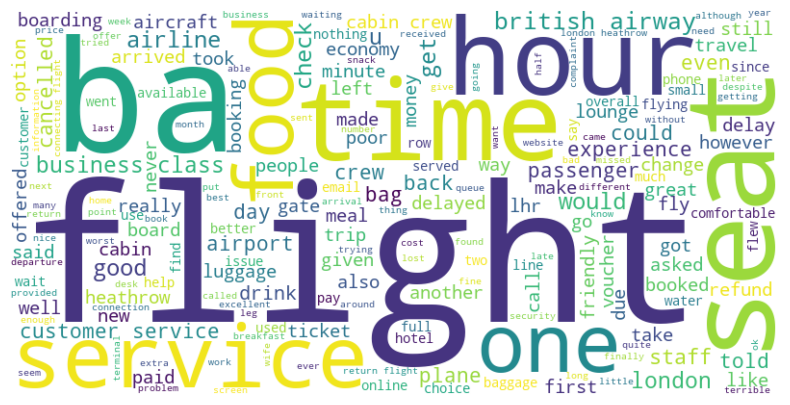

/var/folders/7s/ctsz6mrn2736_l3pgbrc0n440000gn/T/ipykernel_50407/2355735876.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette="coolwarm")


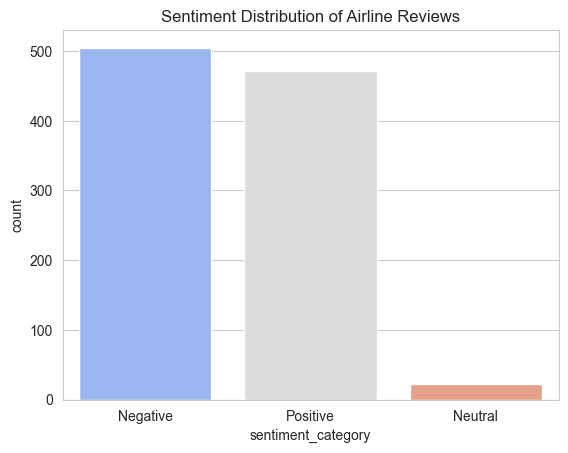

/var/folders/7s/ctsz6mrn2736_l3pgbrc0n440000gn/T/ipykernel_50407/2355735876.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=topic_counts.index, x=topic_counts.values, palette="Blues_d")


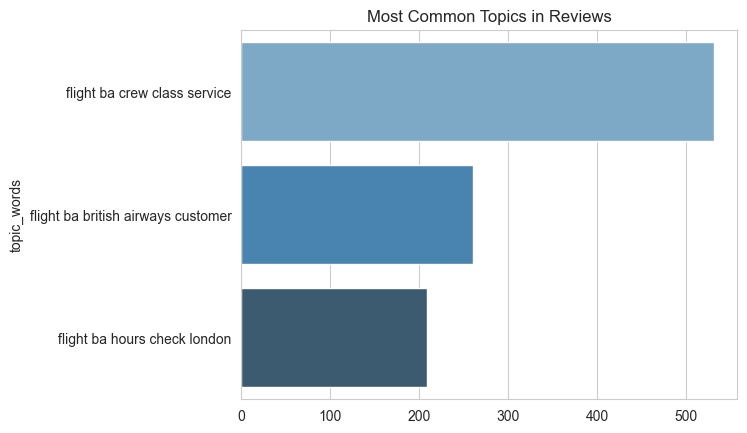

Top 10 bigrams/trigrams:
british airways: 416
business class: 323
customer service: 213
cabin crew: 170
return flight: 90
connecting flight: 81
london heathrow: 81
flight cancelled: 66
premium economy: 64
club world: 61


/var/folders/7s/ctsz6mrn2736_l3pgbrc0n440000gn/T/ipykernel_50407/2355735876.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngrams_df, palette="coolwarm")


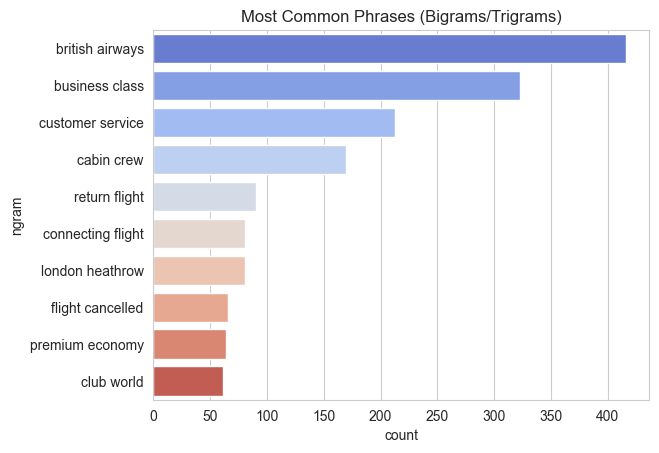

Top topics found in reviews:
topic_words
flight ba crew class service          531
flight ba british airways customer    260
flight ba hours check london          209
Name: count, dtype: int64
Sentiment Analysis Overview:
sentiment_category
Negative    505
Positive    472
Neutral      23
Name: count, dtype: int64


In [76]:
# 1. Data Cleaning
def clean_text(text):
    text = re.sub(r'Not Verified', ' ', text)  
    text = re.sub(r'Trip Verified', ' ', text)  
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)  # Remove URLs and mentions
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# 2. Sentiment Analysis (using VADER)
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Compound score is the overall sentiment

df['sentiment'] = df['cleaned_reviews'].apply(sentiment_analysis)

# Sentiment Category (Positive, Neutral, Negative)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# 3. Topic Modeling with LDA
# Vectorize the cleaned reviews
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
review_matrix = vectorizer.fit_transform(df['cleaned_reviews'])

# Latent Dirichlet Allocation for topic modeling
lda_model = LDA(n_components=3, random_state=42)  # You can adjust n_components based on review size
lda_model.fit(review_matrix)

# Extracting the topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 5)
df['topic'] = lda_model.transform(review_matrix).argmax(axis=1)

# 4. WordCloud of Reviews
all_words = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words('english')).generate(all_words)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 5. Visualize Sentiment Distribution
sns.countplot(x='sentiment_category', data=df, palette="coolwarm")
plt.title('Sentiment Distribution of Airline Reviews')
plt.show()

# 6. Visualize Topics
df['topic_words'] = df['topic'].apply(lambda x: topics[x])
topic_counts = df['topic_words'].value_counts()

sns.barplot(y=topic_counts.index, x=topic_counts.values, palette="Blues_d")
plt.title('Most Common Topics in Reviews')
plt.show()

# 7. Common Phrases: Extract Bigrams and Trigrams
# Vectorize with n-grams (bigrams and trigrams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_df=0.95, min_df=2)
bigram_matrix = bigram_vectorizer.fit_transform(df['cleaned_reviews'])

# Get the most common n-grams
def get_top_n_ngrams(bigram_vectorizer, corpus_vectorizer, n=None):
    count_values = corpus_vectorizer.sum(axis=0).A1
    vocab = bigram_vectorizer.get_feature_names_out()
    freq_distribution = Counter(dict(zip(vocab, count_values)))
    return freq_distribution.most_common(n)

# Display top 10 bigrams/trigrams
top_ngrams = get_top_n_ngrams(bigram_vectorizer, bigram_matrix, 10)

# Print or visualize the most common bigrams/trigrams
print("Top 10 bigrams/trigrams:")
for phrase, count in top_ngrams:
    print(f"{phrase}: {count}")

# Visualize top bigrams/trigrams
ngrams_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
sns.barplot(x='count', y='ngram', data=ngrams_df, palette="coolwarm")
plt.title('Most Common Phrases (Bigrams/Trigrams)')
plt.show()

# Summarize Insights
print("Top topics found in reviews:")
print(df['topic_words'].value_counts())

print("Sentiment Analysis Overview:")
print(df['sentiment_category'].value_counts())


## Cleaning Data

In [445]:
df = pd.read_csv("data/BA_reviews_30.csv", index_col=0)

In [446]:
def change_words(text):
    text = re.sub(r'not verified', ' ', text)  
    text = re.sub(r'trip verified', ' ', text) 
    text = re.sub(r'verified review', ' ', text)
    text = re.sub(r"i'm", 'i', text)
    text = re.sub(r"i've", 'i', text)
    text = re.sub(r"she's", 'she', text)
    text = re.sub(r"he's", 'he', text)
    text = re.sub(r"it's", 'it', text)
    text = re.sub(r"they're", 'they', text)
    text = re.sub(r"we're", 'we', text)
    text = re.sub(r"you're", 'you', text)
    text = re.sub(r"i'll", 'i will', text)
    text = re.sub(r"she'll", 'she will', text)
    text = re.sub(r"he'll", 'he will', text)
    text = re.sub(r"it'll", 'it will', text)
    text = re.sub(r"they'll", 'they will', text)
    text = re.sub(r"we'll", 'we will', text)
    text = re.sub(r"you'll", 'you will', text)
    text = re.sub(r"'ll ", ' ', text)
    text = re.sub(r"hadn't", 'had not', text)
    text = re.sub(r"haven't", 'have not', text)
    text = re.sub(r"hasn't", 'has not', text)
    text = re.sub(r"didn't", 'did not', text)
    text = re.sub(r"don't", 'do not', text)
    text = re.sub(r"won't", 'will not', text)
    text = re.sub(r"wouldn't", 'not', text)
    text = re.sub(r"check-in", 'check_in', text)
    text = re.sub(r"check in", 'check_in', text)
    text = re.sub(r"was", ' ', text)
    text = re.sub(r"were", ' ', text)
    text = re.sub(r"would", ' ', text)
    text = re.sub(r"will", ' ', text)
    text = re.sub(r'british airways', 'ba', text)
    text = re.sub(r'fly ', 'flight ', text)
    text = re.sub(r'flying ', 'flight ', text)
    text = re.sub(r'flew ', 'flight ', text)

    return text

In [447]:
# Define a function to clean email messages
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = change_words(text)
    
    text = re.sub(r'http\S+|www\S+|@\S+', '', text) 
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters (punctuation)

    text = re.sub(r'\s+[a-z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces

    
    return text

In [448]:
def preprocess_text(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    # Tokenize the text
    tokens = word_tokenize(text)
    tokens = [word for word in tokens]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)

In [449]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [450]:
df['length'] = df['reviews'].str.len()
df['word_count'] = df['reviews'].apply(word_count)

In [451]:
df['clean_reviews'] = df['reviews'].apply(clean_text)
df['preprocess_reviews'] = df['clean_reviews'].apply(preprocess_text)

In [452]:
df['verified'] = df['reviews'].apply(lambda x: 0 if 'Not Verified' in x else 1)

In [453]:
df.iloc[96, 4]

'great experience outset poorly managed bused u parking slot u wait 15 minute bus plane ready ba business class business class tired small generally worth ticket price table sit straight arm rest secure terrible screen patch first class airline apparently ba think long way go'

In [454]:
df.iloc[96, 4]

'great experience outset poorly managed bused u parking slot u wait 15 minute bus plane ready ba business class business class tired small generally worth ticket price table sit straight arm rest secure terrible screen patch first class airline apparently ba think long way go'

In [455]:
df

,reviews,length,word_count,clean_reviews,preprocess_reviews,verified
0,✅ Trip Verified | BA is barely a step above low cost airlines. They try to dime and nickel everywhere possible. I now found out that you cannot select a seat a check in anymore when you have no baggage. Next time I go with low cost carrier since there is virtually no difference anymore.,289,55,ba is barely step above low cost airlines they try to dime and nickel everywhere possible now found out that you cannot select seat check_in anymore when you have no baggage next time go with low cost carrier since there is virtually no difference anymore,ba barely step low cost airline try dime nickel everywhere possible found can not select seat check_in anymore baggage next time go low cost carrier since virtually difference anymore,1
1,"Not Verified | Happy with the flight crew. Hadn't been on a plane in 20 years and was stressed out. They made it comfortable for me and I want to say thank you to the flight crew for helping me relax. If I go back to France again, I'm going British Airways.",258,52,happy with the flight crew had not been on plane in 20 years and stressed out they made it comfortable for me and want to say thank you to the flight crew for helping me relax if go back to france again going ba,happy flight crew plane 20 year stressed made comfortable want say thank flight crew helping relax go back france going ba,0
2,"✅ Trip Verified | Horrible service from boarding to landing. I flew from London to Marrakech and was very disappointed with the arrangement for boarding, my food is horrible, the staff are arrogant to me and the seats are super uncomfortable for a 3h40min flight business class. Today taking the flight from Marrakech to London. I do not recommend.",351,59,horrible service from boarding to landing flight from london to marrakech and very disappointed with the arrangement for boarding my food is horrible the staff are arrogant to me and the seats are super uncomfortable for 3h40min flight business class today taking the flight from marrakech to london do not recommend,horrible service boarding landing flight london marrakech disappointed arrangement boarding food horrible staff arrogant seat super uncomfortable 3h40min flight business class today taking flight marrakech london recommend,1
3,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented.",293,49,my wife and are very disappointed with flight on ba our flight on 9 12 cancelled while all other airlines flying in addition our seats changed multiple times without any explanation the people working very rude and not at all customer oriented,wife disappointed flight ba flight 9 12 cancelled airline flying addition seat changed multiple time without explanation people working rude customer oriented,0
4,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with no connecting concerns. Our baggage arrived safely at Berlin. I understand BA has had some very negative reviews by customers but our experience on this occasion was very positive and would happily recommend and use BA.",960,163,we 

In [441]:
df[df['preprocess_reviews'].str.contains(' wa ')]

,reviews,length,word_count,clean_reviews,preprocess_reviews,verified


## Sentiment analysis

In [456]:
# Function to get sentiment score
def get_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

In [457]:
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the preprocessed reviews
df['sentiment_score'] = df['clean_reviews'].apply(get_sentiment)

# Categorize reviews based on sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [458]:
# Print sentiment distribution
print(df['sentiment'].value_counts())

sentiment
positive    1619
negative    1334
neutral       47
Name: count, dtype: int64


In [462]:
df.loc[df['sentiment']=='neutral', 'sentiment'] = 'negative'

In [463]:
df[df['sentiment']=='neutral']['sentiment_score']

Series([], Name: sentiment_score, dtype: float64)

In [460]:
for row, item in df[df['sentiment']=='neutral'].iterrows():
    print(item['clean_reviews'])
    print('__________________________________________')

 singapore to heathrow business class on an a380 800 is premium economy plus experience from the economy class sized toilets to the badly designed coffin shaped business class pods the experience is substandard business class experience business class pod storage is small drawer at the foot of the pod the privacy screens are opaque plastic sheets so you are kept awake by your neighbour as their screen lights up your pod when the seat is made into its coffin shaped bed the cold hard plastic seat moulds are an unpleasant surprise for those that turn in their sleep you have choice of having your neighbour step over your calf height footrest hopefully not brushing your feet with theirs or having to step over your neighbour feet footrest with the footrest down heaven forbid you try to lever yourself into more comfortable position as the slightest pressure causes the footrest to collapse into its floor level position if you are in the aisle seat which is open to the aisle kiss goodbye to any

In [461]:
df.groupby(['verified', 'sentiment']).size()

verified  sentiment
0         negative      146
          neutral         2
          positive      135
1         negative     1188
          neutral        45
          positive     1484
dtype: int64

In [607]:
pd.DataFrame(df.groupby(['sentiment']).size())

,0
sentiment,
negative,1381
positive,1619


In [613]:
sentiment_df = df.groupby('sentiment').agg(count=('sentiment', 'size')).reset_index()

In [614]:
sentiment_df

,sentiment,count
0,negative,1381
1,positive,1619


In [589]:
sns.set_style('whitegrid')

In [556]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "font.family": font_family,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [572]:
font_family = 'PT Mono'
background_color = "#EEEEEE"
grid_color = "#b9cfed"
bar_color = "#eb2226"
text_color = "#01295c"
set_seaborn_style(font_family, background_color, grid_color, text_color)

In [599]:
def create_bar_chart(row):    
    return sns.barplot(
        x=row.index.str.capitalize().values,
        y=row.values,
        orient="v"
    )

def format_axes(ax):
    ax.tick_params("x", labelsize=10, pad=10)
    ax.tick_params("y", labelsize=10, pad=10)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}K".format(int(x / 1000)) for x in ax.get_xticks()[:-1]],
        fontsize=10
    )
    
    
def add_bar_icons(ax, row, background_color, zoom, pad):
    for index, (name, value) in enumerate(row.items()): 
        icon = plt.imread("./icons/{}.png".format(name.lower()))
        image = OffsetImage(icon, zoom=zoom, interpolation="lanczos", resample=True, visible=True)
        image.image.axes = ax

        ax.add_artist(AnnotationBbox(
            image, (value, index), frameon=True,
            xycoords="data",
            bboxprops={
                "facecolor": "#fff",
                # "linewidth": 3,
                "edgecolor": background_color,
                "boxstyle": "circle, pad={}".format(pad),
            }
        ))
        
        
def create_image_from_figure(fig):
    plt.tight_layout()

    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    plt.close() 
    
    return Image.fromarray(data)


def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    image = Image.new("RGB", (size[0] + left + right, size[1] + top + bottom), background)
    image.paste(chart, (left, top))
    return image

In [600]:
row = sentiment_df.iloc[-1]

fig = plt.figure(figsize=(10, 5))
ax = create_bar_chart(row)

# New functions
# format_axes(ax)
add_bar_icons(ax, row, background_color, zoom=0.03, pad=0.5)
# add_icon(ax, "star", 0.46, 1.26)
# image = create_image_from_figure(fig)
# image = add_padding_to_chart(image, 0, 10, 10, 10, background_color)
plt.title("Sentiment analysis of British Airways review")
plt.tight_layout()
plt.show()

ValueError: Image size of 627631x449 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x500 with 1 Axes>

In [593]:
images = []

for i in tqdm(range(1, 2000, 10)):
    row =  sentiment_df.iloc[-1]

    fig = plt.figure(figsize=(12, 7))
    ax = create_bar_chart(row, color=bar_color)
    ax.set(xlim=(0, 185000))
    plt.title("Sentiment analysis of British Airways review", fontsize=34, y=1.2, x=0.46)

    format_axes(ax)
    add_bar_icons(ax, row, background_color, zoom=0.09, pad=0.9)
    # add_icon(ax, "star", 0.46, 1.26)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 40, 0, background_color)
    images.append(image)
    
images.reverse()

100%|██████████| 200/200 [00:18<00:00, 10.97it/s]


In [594]:
images = images + [images[-1] for _ in range(20)]

imageio.mimwrite('./animation.gif', images, duration=50)

In [605]:
sentiment_df.iloc[-1]

sentiment
negative    1381
positive    1619
Name: 0, dtype: int64

In [604]:
data = {'sentiment': ['positive', 'negative'], 'count': [120, 80]}
pd.DataFrame(data)

,sentiment,count
0,positive,120
1,negative,80


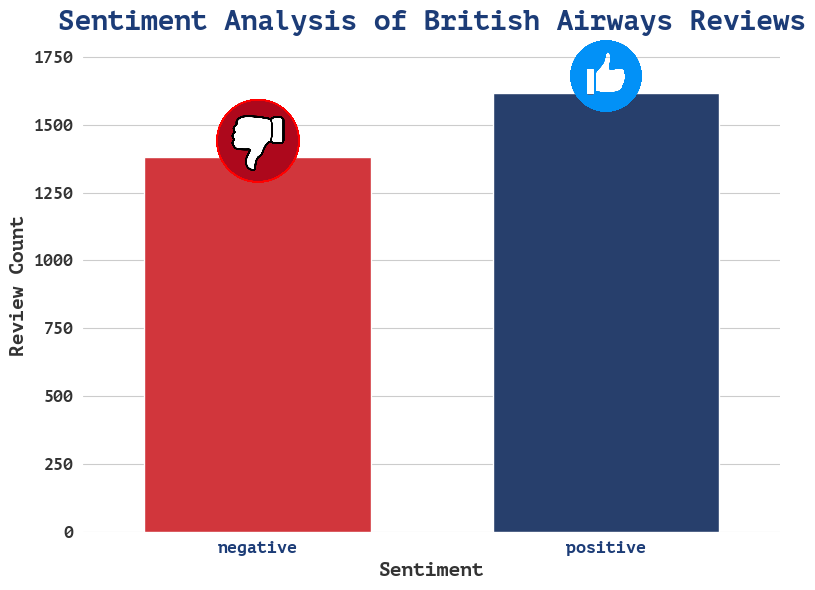

In [819]:

# British Airways colors
ba_colors = ['#eb1c24','#1c3c77']

# Custom font - you can change this to any TTF file you have or a built-in font
# Download a font if needed or use a system font.
# fm.findSystemFonts() to see all installed fonts
plt.rcParams['font.family'] ='PT Mono'  # Set a custom font family

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set background color for the figure
ax = sns.barplot(x='sentiment', y='count', data=sentiment_df, palette=ba_colors, width=.65)

# Add customizations for the chart background
ax.set_facecolor('#ffffff')  # Set background of the plot area to white
# ax.grid(False)  # Disable gridlines for a cleaner look

# Add titles and labels with styling
plt.title('Sentiment Analysis of British Airways Reviews', fontsize=20, color='#1c3c77', fontweight='bold')
plt.xlabel('Sentiment', fontsize=14, color='#333333')
plt.ylabel('Review Count', fontsize=14, color='#333333')

# Customize the tick labels
plt.xticks(fontsize=12, fontweight='bold', color='#1c3c77')
plt.yticks(fontsize=12, fontweight='bold', color='#333333')

# Adjust the y-axis limit to give space for icons
max_count = sentiment_df['count'].max()
plt.ylim(0, max_count + 200)  # Add extra space above the bars

# Adding icons (like and dislike)
like_icon_path = './icons/like_3.png'
dislike_icon_path = './icons/dislike.png'

like_icon = Image.open(like_icon_path)
dislike_icon = Image.open(dislike_icon_path)

def add_icon(icon, x, y, ax):
    """Helper function to place an icon on top of the bars"""
    imagebox = OffsetImage(icon, zoom=0.1)  # Adjust the size of the icon with zoom
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Add icons at the top of the bars with offset
icon_offset = 60  # Offset value to move the icons above the bars

for i, (sentiment, count) in enumerate(zip(sentiment_df['sentiment'], sentiment_df['count'])):
    if sentiment == 'positive':
        add_icon(like_icon, i, count + icon_offset, ax)  # Adjust the y-coordinate to include the offset
    else:
        add_icon(dislike_icon, i, count + icon_offset, ax)
        
# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show plot with tight layout
plt.tight_layout()
plt.show()


<Axes: ylabel='sentiment'>

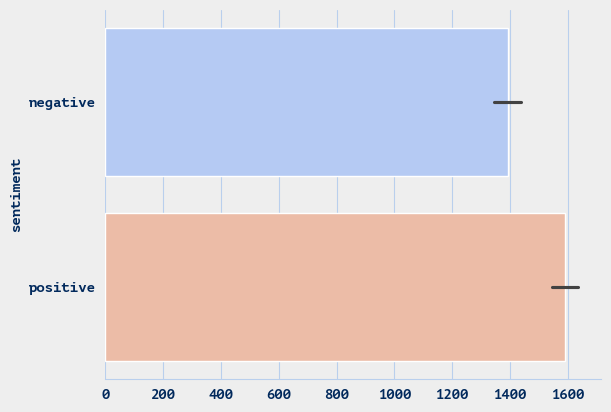

In [581]:
sns.barplot(df['sentiment'], palette="coolwarm")

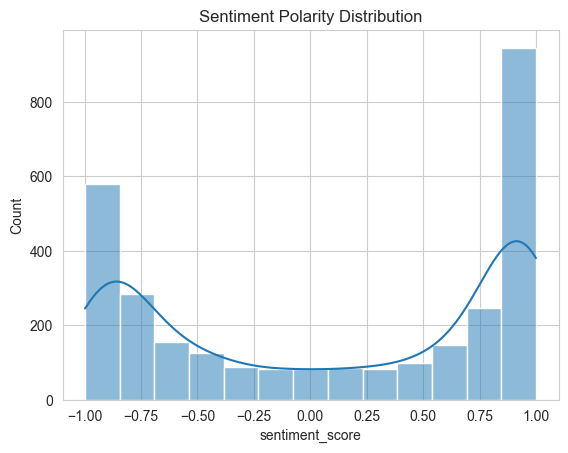

In [384]:
sns.histplot(df['sentiment_score'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

In [798]:
df[df['sentiment_score'].between(-0.6, 0.75)].sample(10)

,reviews,length,word_count,clean_reviews,preprocess_reviews,verified,sentiment_score,sentiment,delay_mentions,rude_mentions,upgrade_mentions,good_mentions,bad_mentions,cancelled_mentions,cut_reviews
2784,"My daughter was booked on a flight from Antigua to St. Kitts on September 5, 2015. (flight BA2157) The flight left nearly 10 minutes early stranding 30 passengers who had just managed to get through customs. I have no idea how a flight can leave early or how you can leave without 30 passengers. The attendant at the desk merely informed these passengers that the desk was closed and they should return tomorrow. It was 3.00 on a Saturday afternoon. Nothing was offered to help these passengers get to their final destination. After calling multiple times and sending various emails, I was ""granted"" a refund. My full refund offer came with a $50 cancellation fee and a $40 service fee. I have yet to accept the offer. We never cancelled her flight nor received anything that looks like service. Do not fly this airline. They are inept and have no idea what customer service is. There is no 'value for money' when the flight departs early.",940,166,my daughter booked on flight from antigua to st kitts on september 5 2015 flight ba2157 the flight left nearly 10 minutes early stranding 30 passengers who had just managed to get through customs have no idea how flight can leave early or how you can leave without 30 passengers the attendant at the desk merely informed these passengers that the desk closed and they should return tomorrow it 3 00 on saturday afternoon nothing offered to help these passengers get to their final destination after calling multiple times and sending various emails granted refund my full refund offer came with 50 cancellation fee and 40 service fee have yet to accept the offer we never cancelled her flight nor received anything that looks like service do not flight this airline they are inept and have no idea what customer service is there is no value for money when the flight departs early,daughter booked flight antigua st kitts september 5 2015 flight ba2157 flight left nearly 10 minute early stranding 30 passenger managed get custom idea flight leave early leave without 30 passenger attendant desk merely informed passenger desk closed return tomorrow 3 00 saturday afternoon nothing offered help passenger get final destination calling multiple time sending various email granted refund full refund offer came 50 cancellation fee 40 service fee yet accept offer never cancelled flight received anything look like service flight airline inept idea customer service value money flight departs early,1,-0.0654,negative,0,0,0,0,0,1,daughter booked antigua st kitts september 5 2015 2157 left nearly 10 minute early stranding 30 passenger managed get custom idea leave early leave without 30 passenger attendant desk merely informed passenger desk closed return tomorrow 3 00 saturday afternoon nothing offered help passenger get final destination calling multiple time sending various email granted refund full refund offer came 50 cancellation fee 40 service fee yet accept offer never cancelled received anything look like service inept idea customer service value money departs early
2924,"Given BA's bizarre and relentless assault on its premium passengers, dropped back to economy as no point flying club Europe given seat leg room now the same. Nice new interior so clean, adequate seat, flight left on time, quick baggage pick up-didn't bother with the sandwich offered, my daughter did, couldn't really see any difference than the sandwich being offered in club except it's served in a box. Crew made no effort to disguise their desire to be somewhere else. Overall I expected little and so not disappointed. Decent value for money, but just another flight and a few hours to watch a film on the iPad.",616,107,given ba bizarre and relentless assault on its premium passengers dropped back to economy as no point flight club europe given seat

In [801]:
df.iloc[2074]['reviews']

"✅ Verified Review |  Madrid to Montreal via London Heathrow. Coming back from my honeymoon, me and my wife had our luggage misplaced and is missing over the holidays, 3 weeks of clothes in our suitcases, and no one is able to give us answers to where it is or why it's missing. I can't even get a hold of anyone in their offices to speak to in regards to a claim? Everyone says to do it online, sure and how long is it going to take for someone to get back to me? This is not a way to handle customers. I will make sure to never fly on British Airways again."

## Counting words / WordCloud

In [370]:
# def plot_word_cloud(reviews):
#     # Combine all the cleaned reviews into one string
#     all_reviews = " ".join(review for review in reviews)
#     
#     wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words('english')).generate(all_reviews)
#     # Display the word cloud
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

In [712]:
def plot_word_cloud(reviews, mask):
    # Combine all the cleaned reviews into one string
    all_reviews = " ".join(review for review in reviews)
    
    # Define British Airways color palette (blue and red)
    ba_colors = ['#1c3c77', '#eb1c24']
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          background_color='white', 
                          stopwords=stopwords.words('english'),
                          colormap='bwr_r',
                          mask=mask,
                          contour_width=0.5,
                          contour_color='#eb1c24').generate(all_reviews)
    
    # Create a color generator based on the mask image (optional)
    # image_colors = ImageColorGenerator(ba_colors)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [719]:
plane_mask = np.array(Image.open('./icons/plane_2.jpg'))  # Make sure to use a black and white plane silhouette
like_mask = np.array(Image.open('./icons/like_mask.jpg'))  # Make sure to use a black and white plane silhouette
dislike_mask = np.array(Image.open('./icons/dislike_mask.png'))  # Make sure to use a black and white plane silhouette

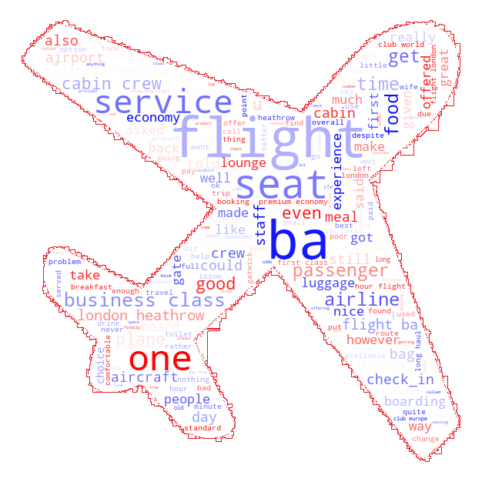

In [717]:
plot_word_cloud(df['preprocess_reviews'], plane_mask)

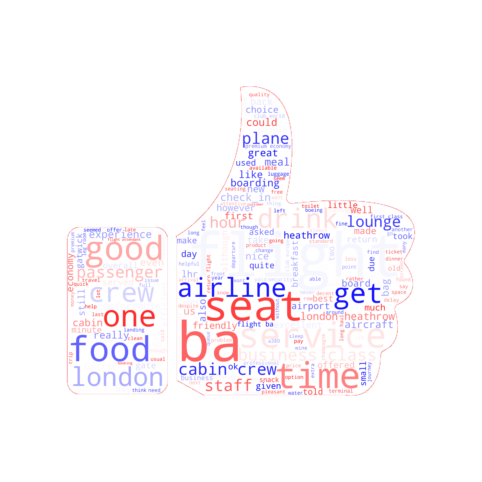

In [720]:
plot_word_cloud(df[df['sentiment'] == 'positive']['clean_reviews'], like_mask)

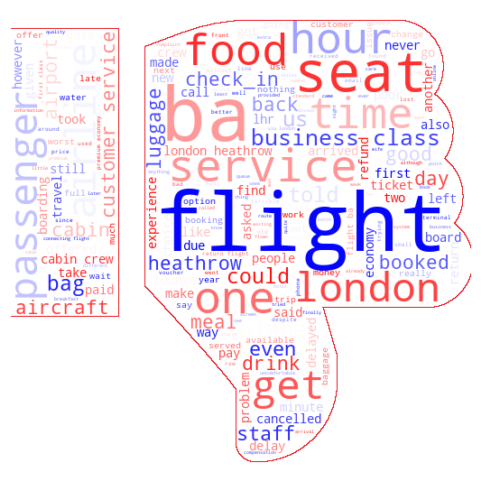

In [707]:
plot_word_cloud(df[df['sentiment'] == 'negative']['clean_reviews'], dislike_mask)

In [757]:
def clean_obvious(text):
    text = re.sub(r'ba', ' ', text)
    text = re.sub(r'flight', ' ', text)
    text = re.sub(r'london', ' ', text)
    text = re.sub(r'airline', ' ', text)
    
    return text

In [776]:
df['cut_reviews'] = df['preprocess_reviews'].apply(clean_obvious)

In [721]:
def get_top_n_ngrams(count_vectorizer, corpus_vectorizer, n=None):
    count_values = corpus_vectorizer.sum(axis=0).A1
    vocab = count_vectorizer.get_feature_names_out()
    freq_distribution = Counter(dict(zip(vocab, count_values)))
    return freq_distribution.most_common(n)

In [810]:
def print_top_n_ngrams(ngram_range, df, col, title):
    # Vectorize with n-grams (bigrams and trigrams)
    
    bigram_vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_df=0.95, min_df=2)
    bigram_matrix = bigram_vectorizer.fit_transform(df[col])
    
    # Display top 10 bigrams/trigrams
    top_ngrams = get_top_n_ngrams(bigram_vectorizer, bigram_matrix, 10)
    
    # Print or visualize the most common bigrams/trigrams
    print("Top 10 bigrams/trigrams:")
    for phrase, count in top_ngrams:
        print(f"{phrase}: {count}")
    
    # Visualize top bigrams/trigrams
    ngrams_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    sns.barplot(x='count', y='ngram', data=ngrams_df, palette="coolwarm", hue='ngram', legend=False)
    plt.title(f'Most Common Phrases {title}')
    plt.show()

Top 10 bigrams/trigrams:
flight: 7423
ba: 5966
service: 2378
london: 2060
seat: 1844
food: 1796
time: 1722
crew: 1702
seats: 1631
class: 1621


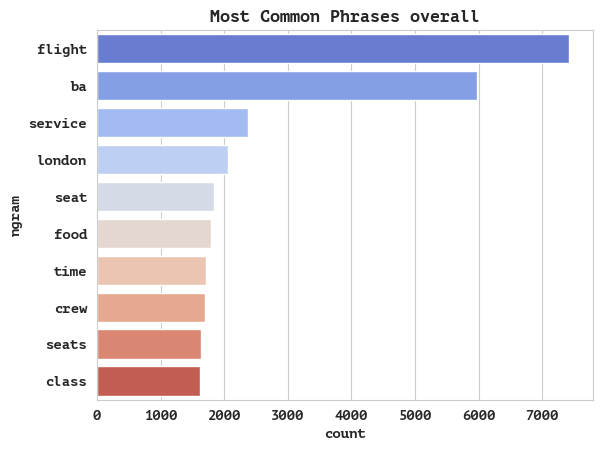

In [811]:
print_top_n_ngrams((1,2), df, 'clean_reviews', 'overall')

Top 10 bigrams/trigrams:
seat: 3484
service: 2501
time: 2028
food: 1800
crew: 1745
class: 1647
hour: 1645
cabin: 1592
good: 1525
heathrow: 1360


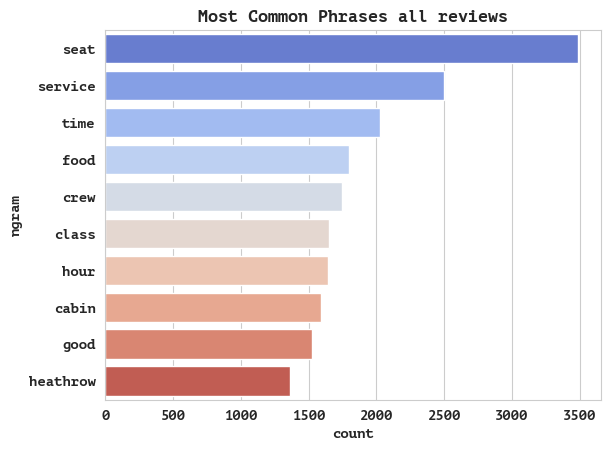

In [812]:
print_top_n_ngrams((1,2), df, 'cut_reviews', 'all reviews')

Top 10 bigrams/trigrams:
business class: 977
cabin crew: 704
customer service: 468
premium economy: 323
club world: 240
long haul: 239
club europe: 205
food drink: 189
leg room: 168
economy class: 151


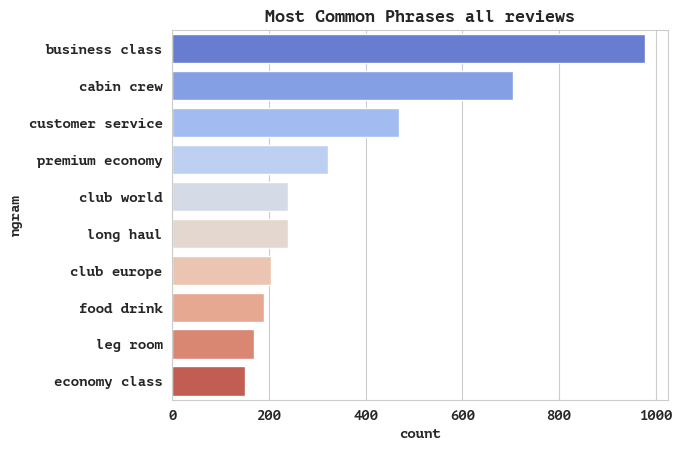

In [813]:
print_top_n_ngrams((2,3), df, 'cut_reviews', 'all reviews')

Top 10 bigrams/trigrams:
business class: 479
cabin crew: 462
premium economy: 190
club world: 173
long haul: 146
club europe: 137
customer service: 127
food drink: 121
seat comfortable: 120
leg room: 119


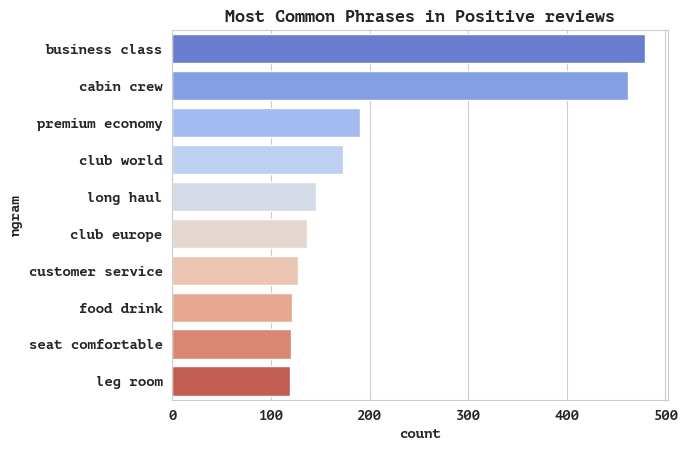

In [814]:
print_top_n_ngrams((2,3), df[df['sentiment'] == 'positive'], 'cut_reviews', 'in Positive reviews')

Top 10 bigrams/trigrams:
business class: 498
customer service: 341
cabin crew: 242
premium economy: 133
long haul: 93
low cost: 81
delayed hour: 77
class seat: 68
club europe: 68
food drink: 68


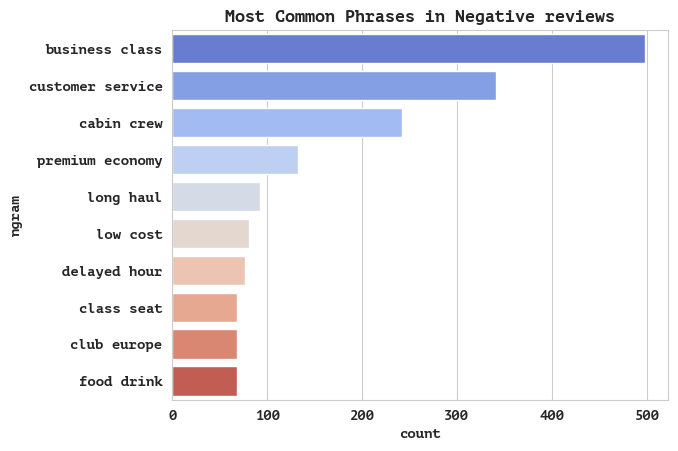

In [815]:
print_top_n_ngrams((2,3), df[df['sentiment'] == 'negative'], 'cut_reviews', 'in Negative reviews')

Top 10 bigrams/trigrams:
business class seat: 38
cabin crew friendly: 34
world traveller plus: 34
new york jfk: 27
low cost carrier: 25
fast track security: 24
boeing 747 400: 20
business class product: 18
business class passenger: 17
club world seat: 17


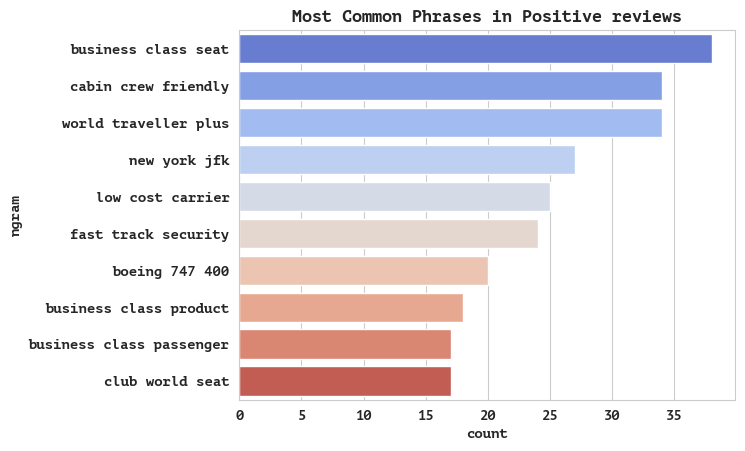

In [816]:
print_top_n_ngrams((3,4), df[df['sentiment'] == 'positive'], 'cut_reviews', 'in Positive reviews')

Top 10 bigrams/trigrams:
business class seat: 52
business class passenger: 30
low cost carrier: 21
business class experience: 18
premium economy seat: 18
business class ticket: 16
worst business class: 16
boeing 747 400: 15
business class cabin: 14
cabin crew member: 14


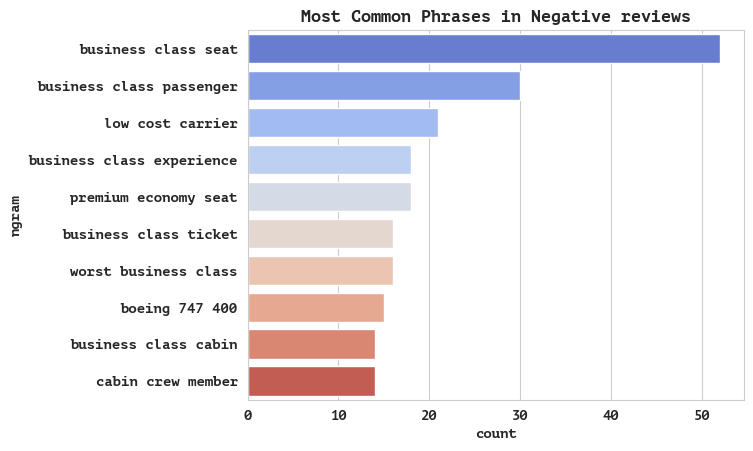

In [817]:
print_top_n_ngrams((3,4), df[df['sentiment'] == 'negative'], 'cut_reviews', 'in Negative reviews')

## Topic Modeling 

In [326]:
# # Split the preprocessed reviews into tokens
# df['tokenized_reviews'] = df['final_clean_reviews'].apply(lambda x: x.split())
# 
# # Create dictionary and document-term matrix for LDA
# dictionary = corpora.Dictionary(df['tokenized_reviews'])
# doc_term_matrix = [dictionary.doc2bow(review) for review in df['tokenized_reviews']]

KeyError: 'final_clean_reviews'

In [220]:
# # Train LDA model (set number of topics)
# lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=3, id2word=dictionary, passes=10)

In [70]:
# # Display the topics
# topics = lda_model.print_topics(num_words=6)
# for idx, topic in topics:
#     print(f"Topic {idx}: {topic}")

Topic 0: 0.030*"flight" + 0.019*"ba" + 0.011*"hour" + 0.009*"u" + 0.008*"get" + 0.008*"day"
Topic 1: 0.026*"flight" + 0.021*"ba" + 0.012*"seat" + 0.011*"service" + 0.008*"class" + 0.008*"time"
Topic 2: 0.023*"flight" + 0.020*"ba" + 0.013*"seat" + 0.010*"time" + 0.008*"service" + 0.007*"cabin"


In [186]:
# df.drop(['tokenized_reviews', 'topic', 'topic_words'], axis=1, inplace=True)

In [182]:
# df['tokenized_reviews'] = df['clean_reviews'].apply(word_tokenize)

In [187]:
# def preprocess_text(text):
#     lemmatizer = WordNetLemmatizer()
#     tokens = word_tokenize(text)
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize words
#     return " ".join(tokens)
# 
# # Apply preprocessing to the cleaned reviews
# df['preprocessed_reviews'] = df['clean_reviews'].apply(preprocess_text)

In [805]:
# Extracting the topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

def topic_words(df, col):
    df_copy = df.copy()
    # Vectorize the cleaned reviews
    vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
    review_matrix = vectorizer.fit_transform(df_copy[col])
    
    # Latent Dirichlet Allocation for topic modeling
    lda_model = LDA(n_components=5, random_state=42)  # You can adjust n_components based on review size
    lda_model.fit(review_matrix)
    
    topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 3)
    df_copy['topic'] = lda_model.transform(review_matrix).argmax(axis=1)
    
    # 6. Visualize Topics
    df_copy['topic_words'] = df_copy['topic'].apply(lambda x: topics[x])
    topic_counts = df_copy['topic_words'].value_counts()
    print(topic_counts)
    sns.barplot(y=topic_counts.index, x=topic_counts.values, palette="Blues_d")
    plt.title('Most Common Topics in Reviews')
    plt.show()

topic_words
service crew food       1105
seat food good           867
customer service day     494
class business seat      281
hour minute time         253
Name: count, dtype: int64


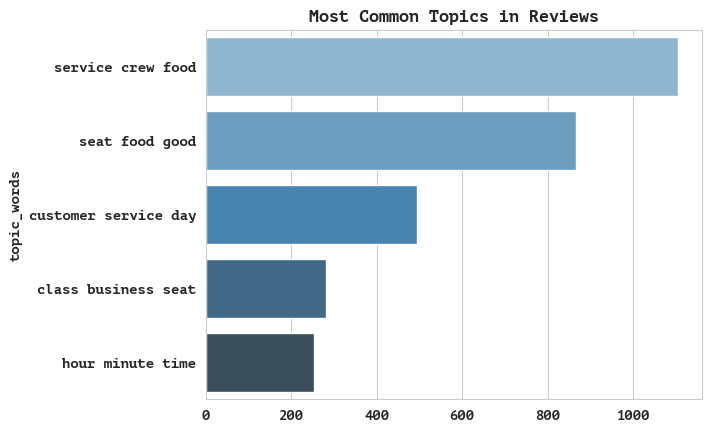

In [806]:
topic_words(df, 'cut_reviews')

topic_words
crew good time            622
seat class economy        424
seat time service         267
service customer staff    216
seat leg food              90
Name: count, dtype: int64


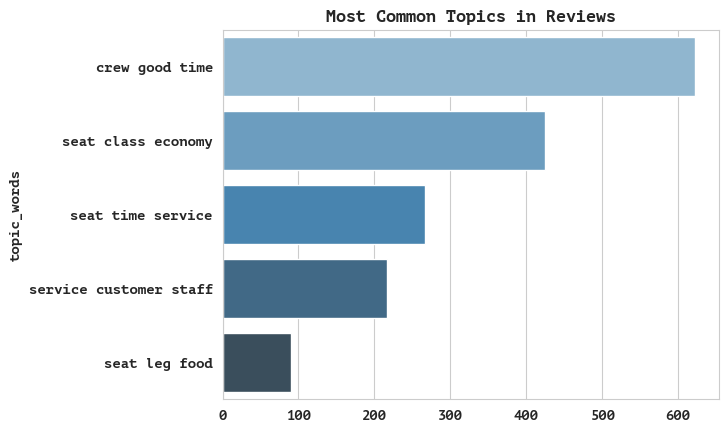

In [808]:
topic_words(df[df['sentiment'] == 'positive'], 'cut_reviews')

topic_words
seat class business       469
service food cabin        278
hour day time             244
told customer check_in    223
seat service class        167
Name: count, dtype: int64


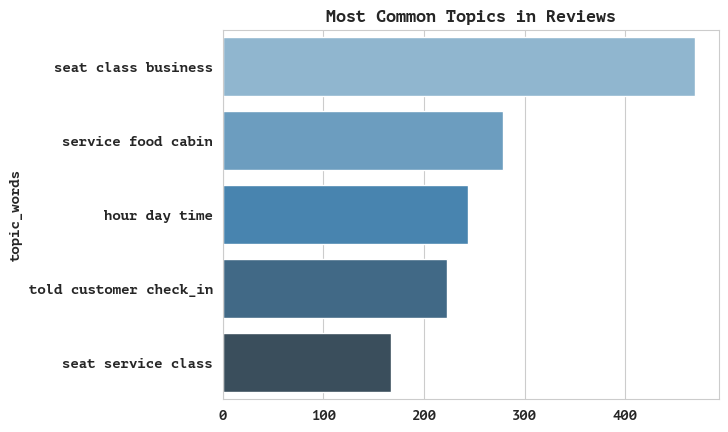

In [809]:
topic_words(df[df['sentiment'] == 'negative'], 'cut_reviews')

## Keywords trend

In [743]:
keywords = ['delay', 'rude', 'upgrade', 'good', 'bad', 'cancelled']

for keyword in keywords:
    df[keyword + '_mentions'] = df['preprocess_reviews'].apply(lambda x: 1 if keyword in x else 0)

In [744]:
for keyword in keywords:
    print(f"{keyword}: {df[keyword + '_mentions'].sum()}")

delay: 583
rude: 155
upgrade: 150
good: 998
bad: 318
cancelled: 239


In [745]:
for keyword in keywords:
    print(f"{keyword}: {df[df['sentiment'] == 'positive'][keyword + '_mentions'].sum()}")

delay: 234
rude: 38
upgrade: 98
good: 755
bad: 141
cancelled: 59


In [746]:
for keyword in keywords:
    print(f"{keyword}: {df[df['sentiment'] == 'negative'][keyword + '_mentions'].sum()}")

delay: 349
rude: 117
upgrade: 52
good: 243
bad: 177
cancelled: 180


In [747]:
df

,reviews,length,word_count,clean_reviews,preprocess_reviews,verified,sentiment_score,sentiment,delay_mentions,rude_mentions,upgrade_mentions,good_mentions,bad_mentions,cancelled_mentions
0,✅ Trip Verified | BA is barely a step above low cost airlines. They try to dime and nickel everywhere possible. I now found out that you cannot select a seat a check in anymore when you have no baggage. Next time I go with low cost carrier since there is virtually no difference anymore.,289,55,ba is barely step above low cost airlines they try to dime and nickel everywhere possible now found out that you cannot select seat check_in anymore when you have no baggage next time go with low cost carrier since there is virtually no difference anymore,ba barely step low cost airline try dime nickel everywhere possible found can not select seat check_in anymore baggage next time go low cost carrier since virtually difference anymore,1,-0.7458,negative,0,0,0,0,0,0
1,"Not Verified | Happy with the flight crew. Hadn't been on a plane in 20 years and was stressed out. They made it comfortable for me and I want to say thank you to the flight crew for helping me relax. If I go back to France again, I'm going British Airways.",258,52,happy with the flight crew had not been on plane in 20 years and stressed out they made it comfortable for me and want to say thank you to the flight crew for helping me relax if go back to france again going ba,happy flight crew plane 20 year stressed made comfortable want say thank flight crew helping relax go back france going ba,0,0.9100,positive,0,0,0,0,0,0
2,"✅ Trip Verified | Horrible service from boarding to landing. I flew from London to Marrakech and was very disappointed with the arrangement for boarding, my food is horrible, the staff are arrogant to me and the seats are super uncomfortable for a 3h40min flight business class. Today taking the flight from Marrakech to London. I do not recommend.",351,59,horrible service from boarding to landing flight from london to marrakech and very disappointed with the arrangement for boarding my food is horrible the staff are arrogant to me and the seats are super uncomfortable for 3h40min flight business class today taking the flight from marrakech to london do not recommend,horrible service boarding landing flight london marrakech disappointed arrangement boarding food horrible staff arrogant seat super uncomfortable 3h40min flight business class today taking flight marrakech london recommend,1,-0.9246,negative,0,0,0,0,0,0
3,"Not Verified | My wife and I are very disappointed with flying on British Airways. Our flight on 9/12 was cancelled while all other airlines were flying. In addition, our seats changed multiple times without any explanation. The people working were very rude and not at all customer oriented.",293,49,my wife and are very disappointed with flight on ba our flight on 9 12 cancelled while all other airlines flying in addition our seats changed multiple times without any explanation the people working very rude and not at all customer oriented,wife disappointed flight ba flight 9 12 cancelled airline flying addition seat changed multiple time without explanation people working rude customer oriented,0,-0.8265,negative,0,1,0,0,0,1
4,"Not Verified | We flew BA between Heathrow and Berlin one way connection. Our experience with BA ground staff at Heathrow was very good, friendly and helpful at check in and baggage drop off. The crew on our flight were also very good, Captain provided some general information and welcoming in a suitable casual but efficient way. Flight stewards were also very friendly and handed out some water and small snack (chocolate bar) unexpected on a 1 hr 20 min flight. Seating was typical for class of aircraft and ticket. Cleanliness was not optimal and could be improved. From memory a slightly delayed departure from Heathrow, which was slightly reduced on arrival at Berlin. This was not an issue for us as Berlin was our destination with

In [752]:
df.iloc[3]['preprocess_reviews']

'wife disappointed flight ba flight 9 12 cancelled airline flying addition seat changed multiple time without explanation people working rude customer oriented'

## Common vs uniqueness 

In [753]:
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['preprocess_reviews'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['preprocess_reviews'])

pos_freq = Counter(positive_reviews.split())
neg_freq = Counter(negative_reviews.split())

common_words = pos_freq & neg_freq  # Words common in both positive and negative reviews
unique_to_positive = pos_freq - neg_freq
unique_to_negative = neg_freq - pos_freq

print("Common words:", common_words.most_common(10))
print("Unique to positive:", unique_to_positive.most_common(10))
print("Unique to negative:", unique_to_negative.most_common(10))


Common words: [('flight', 4046), ('ba', 2942), ('seat', 1480), ('service', 1153), ('london', 973), ('time', 842), ('class', 813), ('one', 714), ('airline', 714), ('food', 689)]
Unique to positive: [('good', 933), ('crew', 599), ('seat', 515), ('food', 422), ('comfortable', 372), ('cabin', 344), ('time', 344), ('drink', 329), ('friendly', 317), ('lounge', 314)]
Unique to negative: [('hour', 371), ('customer', 310), ('told', 280), ('cancelled', 193), ('day', 174), ('worst', 172), ('ticket', 170), ('u', 156), ('poor', 151), ('airline', 147)]


In [786]:
pos_freq

Counter({'flight': 4330,
         'ba': 3044,
         'seat': 1995,
         'service': 1348,
         'good': 1229,
         'time': 1186,
         'crew': 1172,
         'food': 1111,
         'london': 1087,
         'cabin': 968,
         'class': 834,
         'heathrow': 750,
         'one': 714,
         'airline': 714,
         'business': 677,
         'economy': 660,
         'staff': 653,
         'drink': 646,
         'hour': 637,
         'lounge': 588,
         'get': 586,
         'first': 584,
         'meal': 564,
         'boarding': 522,
         'passenger': 506,
         'check_in': 504,
         'club': 488,
         'experience': 470,
         'plane': 450,
         'return': 436,
         'u': 434,
         'new': 433,
         'well': 427,
         'comfortable': 426,
         'back': 422,
         'like': 414,
         'aircraft': 403,
         'could': 401,
         'friendly': 393,
         'even': 393,
         'really': 387,
         'bag': 387,
        

In [756]:
'cancelled' in positive_reviews

True

In [419]:
# Step 2: Vectorizing the Reviews with Bigrams and Trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_df=0.95, min_df=2)
bigram_trigram_matrix = vectorizer.fit_transform(df['clean_reviews'])

# Step 3: Get the N-gram Counts per Review
ngram_counts = bigram_trigram_matrix.toarray()

# Step 4: Count the Number of Reviews Each N-gram Appears In
ngram_freq_across_reviews = (ngram_counts > 0).sum(axis=0)  # How many reviews each n-gram appears in
vocab = vectorizer.get_feature_names_out()

# Create a DataFrame with N-gram and Frequency across Reviews
ngram_commonality_df = pd.DataFrame({
    'ngram': vocab,
    'review_frequency': ngram_freq_across_reviews  # Number of reviews in which the n-gram appears
})

# Step 5: Categorize N-grams as Common or Unique
# Define threshold for "Common" vs "Unique" (e.g., n-grams appearing in more than 1 review are common)
commonality_threshold = 2
ngram_commonality_df['category'] = ngram_commonality_df['review_frequency'].apply(
    lambda x: 'Common' if x >= commonality_threshold else 'Unique'
)

# # Step 6: Visualize Common vs Unique N-grams
# sns.countplot(x='category', data=ngram_commonality_df, palette="coolwarm")
# plt.title('Commonality vs Uniqueness of N-grams (Bigrams/Trigrams)')
# plt.show()

# Print top 10 common n-grams
top_common_ngrams = ngram_commonality_df[ngram_commonality_df['category'] == 'Common'].sort_values(
    by='review_frequency', ascending=False).head(10)

print("Top Common N-grams (Bigrams/Trigrams):")
print(top_common_ngrams)

# Print top 10 unique n-grams
top_unique_ngrams = ngram_commonality_df[ngram_commonality_df['category'] == 'Unique'].sort_values(
    by='review_frequency', ascending=False).head(10)

print("\nTop Unique N-grams (Bigrams/Trigrams):")
print(top_unique_ngrams)

Top Common N-grams (Bigrams/Trigrams):
                  ngram  review_frequency category
17406   london heathrow               642   Common
4754     business class               582   Common
5015         cabin crew               551   Common
11316         flight ba               540   Common
7919   customer service               321   Common
23347     return flight               230   Common
21900   premium economy               221   Common
2746          ba flight               217   Common
11941     flight london               207   Common
17664         long haul               204   Common

Top Unique N-grams (Bigrams/Trigrams):
Empty DataFrame
Columns: [ngram, review_frequency, category]
Index: []
